In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/Users/birhangborgoyary/Documents/insuaraceproject/Insurance/insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/var/folders/2v/05mhmjxd5_j041jwwm3v16_c0000gn/T/ipykernel_9321/3634923312.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


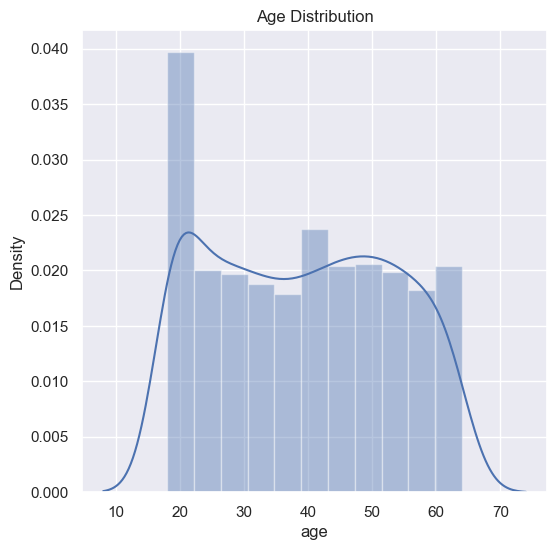

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

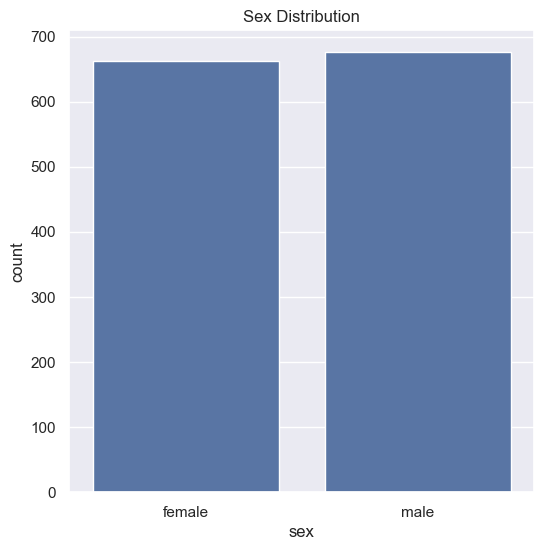

In [9]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/var/folders/2v/05mhmjxd5_j041jwwm3v16_c0000gn/T/ipykernel_9321/1916795400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


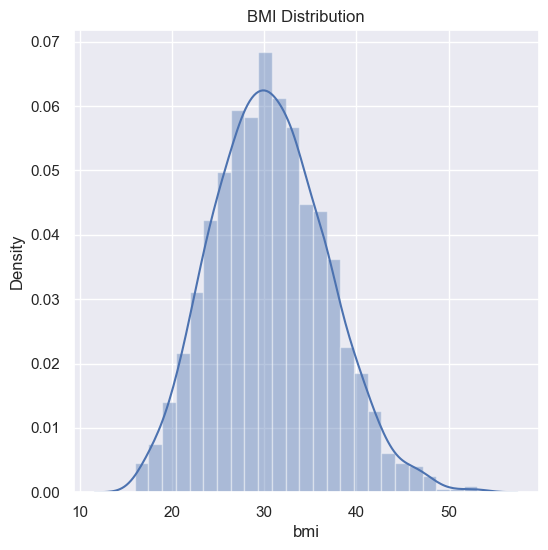

In [11]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

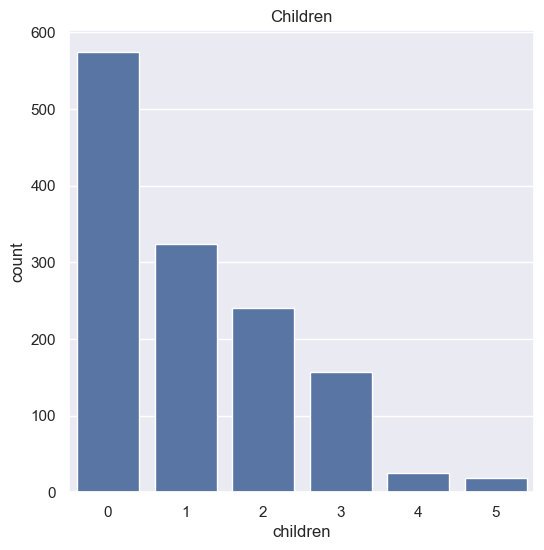

In [12]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

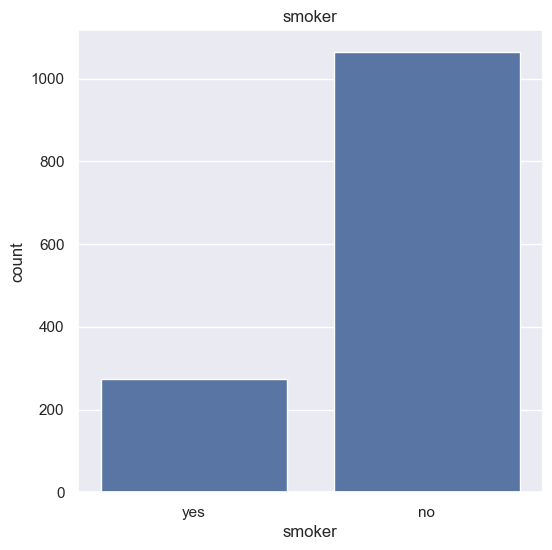

In [14]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

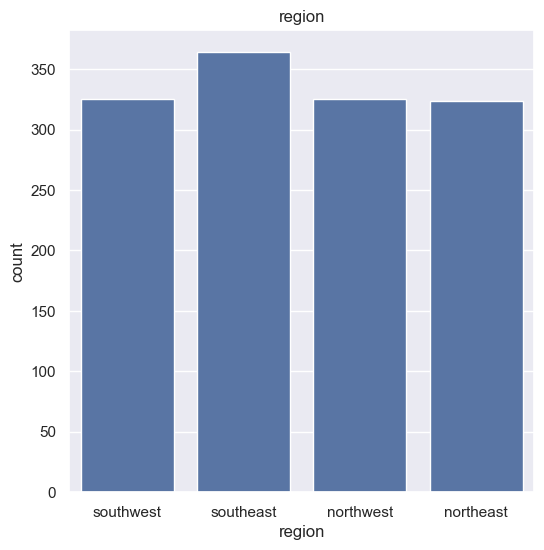

In [16]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/var/folders/2v/05mhmjxd5_j041jwwm3v16_c0000gn/T/ipykernel_9321/3971177022.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


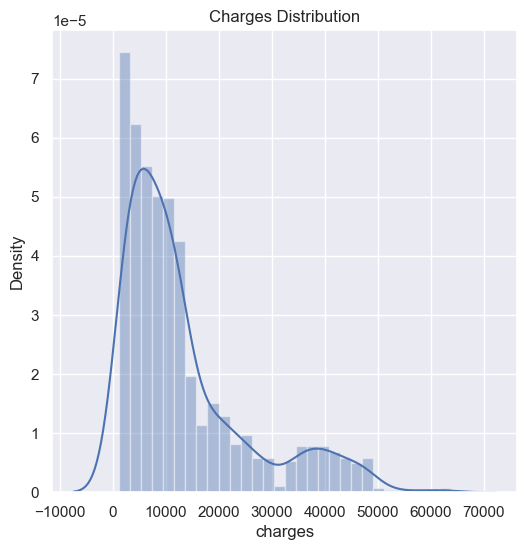

In [18]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [19]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':1,'female':0}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}}, inplace=True)

/var/folders/2v/05mhmjxd5_j041jwwm3v16_c0000gn/T/ipykernel_9321/412628342.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':1,'female':0}}, inplace=True)
/var/folders/2v/05mhmjxd5_j041jwwm3v16_c0000gn/T/ipykernel_9321/412628342.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':1,'no':0}}, inplace=True)
/var/folders/2v/05mhmjxd5_j041jwwm3v16_c0000gn/T/ipykernel_9321/412628342.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated a

In [20]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [21]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       2
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       4
4      32    1  28.880         0       0       4
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       4
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       2
1337   61    0  29.070         0       1       4

[1338 rows x 6 columns]


In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [25]:
#Model Training

lr = LinearRegression()
lr.fit(X_train,Y_train)
svm = SVR()
svm.fit(X_train,Y_train)
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [26]:
# prediction on training data
Y_pred1 = lr.predict(X_test)
Y_pred2 = svm.predict(X_test)
Y_pred3 = rf.predict(X_test)
Y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':Y_test,'Lr':Y_pred1,
                  'svm':Y_pred2,'rf':Y_pred3,'gr':Y_pred4})

In [27]:
df1

,Actual,Lr,svm,rf,gr
17,2395.17155,1520.592422,9194.989367,4970.820014,3997.205442
1091,11286.53870,11570.592018,9380.502862,11537.810755,12159.050017
273,9617.66245,10082.438499,9349.513232,14996.508886,11134.165033
270,1719.43630,2246.217543,9181.832600,2020.447654,3009.267748
874,8891.13950,7881.283620,9307.269629,9447.183623,10056.388319
...,...,...,...,...,...
232,1727.78500,-1669.890650,9189.949867,2166.514576,6619.419081
323,11566.30055,15722.419522,9391.769643,15580.262501,13566.571354
1337,29141.36030,36968.055645,9408.512946,28764.762769,28319.448971
1066,8978.18510,12987.364848,9341.255456,10113.668660,10065.341206


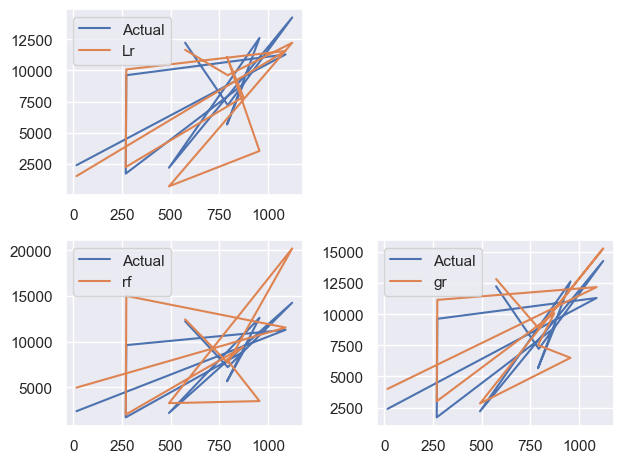

In [28]:
#Compare Performance Visually 
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [29]:
#Evaluating the Algorithm
score1 = metrics.r2_score(Y_test,Y_pred1)
score2 = metrics.r2_score(Y_test,Y_pred2)
score3 = metrics.r2_score(Y_test,Y_pred3)
score4 = metrics.r2_score(Y_test,Y_pred4)

In [30]:
print(score1,score2,score3,score4)

0.7447273869684077 -0.08037769618231372 0.8396751596847742 0.8683710695106717


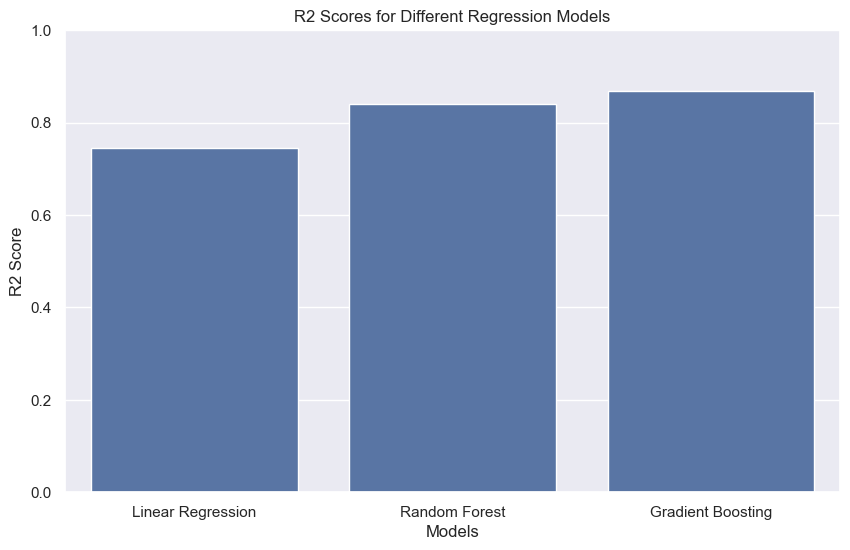

In [31]:
# Define the R2 scores
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [score1, score3, score4]

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('R2 Scores for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for R2 score
plt.show()


In [32]:
s1 = metrics.mean_absolute_error(Y_test,Y_pred1)
s2 = metrics.mean_absolute_error(Y_test,Y_pred2)
s3 = metrics.mean_absolute_error(Y_test,Y_pred3)
s4 = metrics.mean_absolute_error(Y_test,Y_pred4)

In [33]:
print(s1,s2,s3,s4)

4267.213826730733 8466.951204505302 2736.540872368806 2377.7872510334387


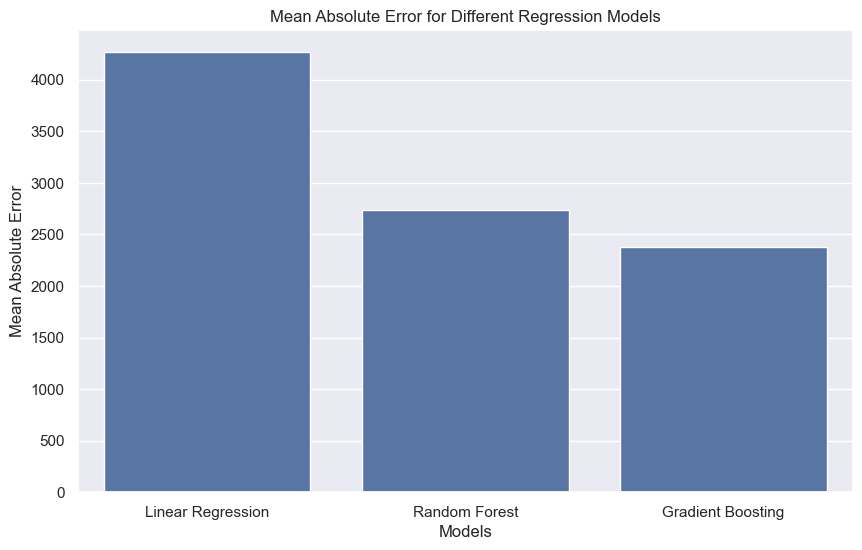

In [34]:
# Define the Mean Absolute Errors
mae_scores = [s1, s3, s4]

# Create a bar graph for Mean Absolute Error
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mae_scores)
plt.title('Mean Absolute Error for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()


In [35]:
#Predict Charges for New Customer
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [36]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [37]:
new_pred = gr.predict(df)
print("Life Insurance Premium for New Customer is : ",new_pred[0])

Life Insurance Premium for New Customer is :  41414.44624736555


In [38]:
#From above we found that gredianBoostingRegressor is the best model for this dataset. Before production, it is good practice to train our model on the entire dataset.

In [39]:
gr = GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [40]:
# Predict Charges For New Customer
new_pred = gr.predict(df)
print("Life Insurance Premium for New Customer is : ",new_pred[0])

Life Insurance Premium for New Customer is :  42317.68512312495


In [41]:
# Save Model Usign Joblib

In [42]:
#import joblib
#joblib.dump(gr,'model_joblib_gr')
#model = joblib.load('model_joblib_gr')
#model.predict([[18,1,33.77,1,0,1]])

In [43]:
#joblib.dump(gr, 'model.pkl')

               Model          MAE           MSE         RMSE        R²  \
0  Linear Regression  4267.213827  3.833704e+07  6191.690842  0.744727   
1      Random Forest  2736.540872  2.407771e+07  4906.903978  0.839675   
2  Gradient Boosting  2377.787251  1.976813e+07  4446.136868  0.868371   

   Explained Variance  
0            0.744752  
1            0.840491  
2            0.868383  


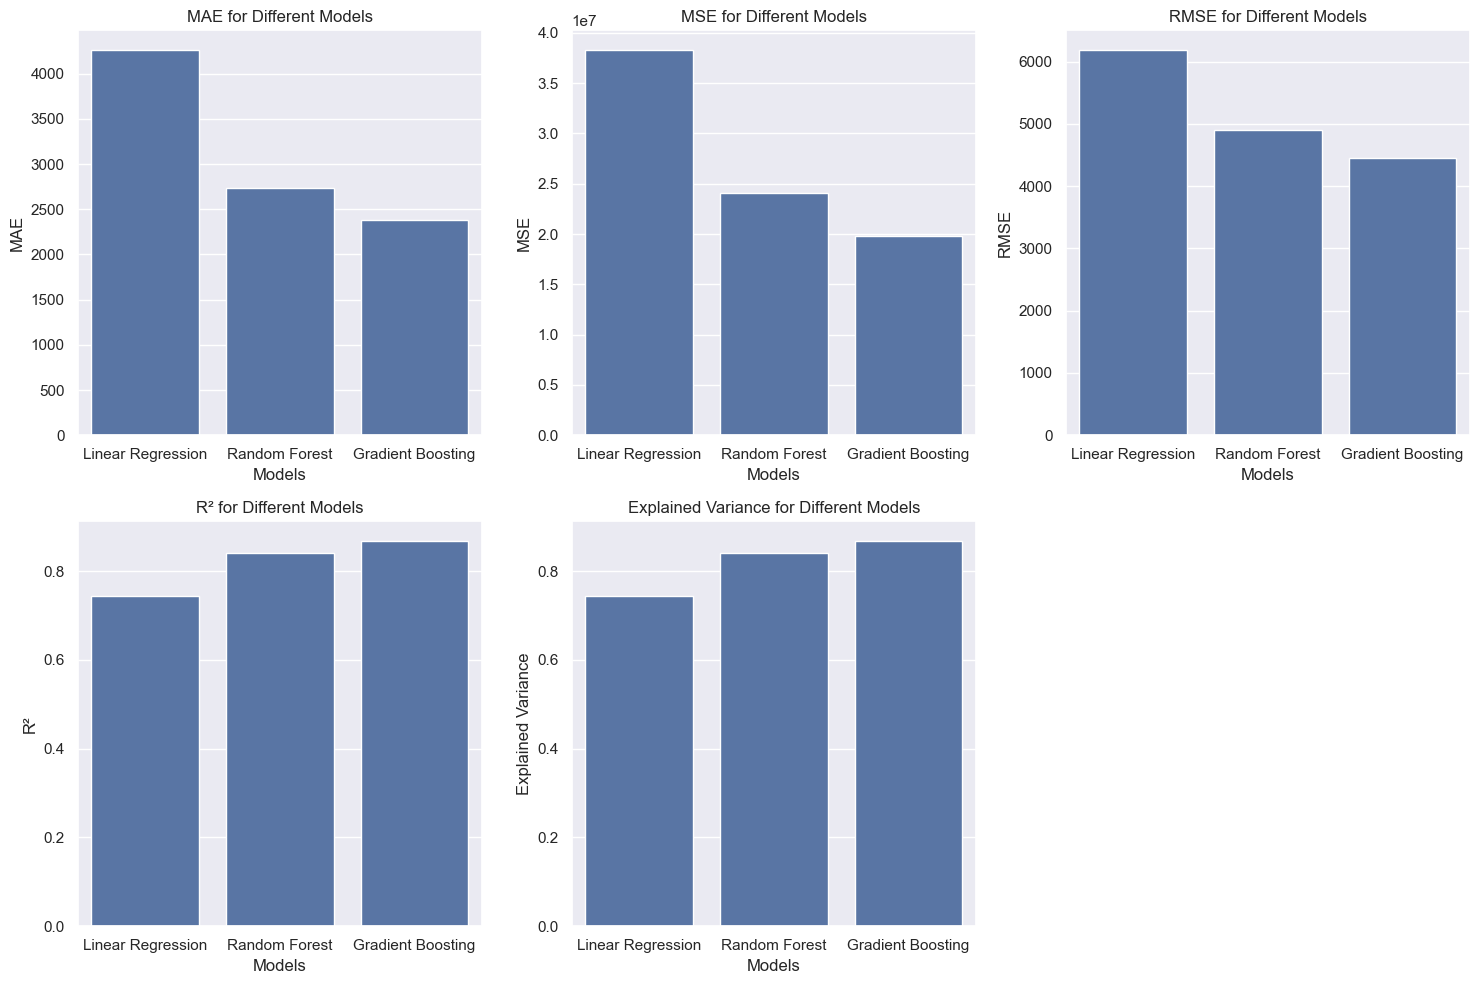

In [45]:
from sklearn.metrics import mean_squared_error, explained_variance_score

# Calculate MAE, MSE, RMSE, R², and Explained Variance Score for each model
mae1 = metrics.mean_absolute_error(Y_test, Y_pred1)
mae3 = metrics.mean_absolute_error(Y_test, Y_pred3)
mae4 = metrics.mean_absolute_error(Y_test, Y_pred4)

mse1 = metrics.mean_squared_error(Y_test, Y_pred1)
mse3 = metrics.mean_squared_error(Y_test, Y_pred3)
mse4 = metrics.mean_squared_error(Y_test, Y_pred4)

rmse1 = np.sqrt(mse1)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)

r2_1 = metrics.r2_score(Y_test, Y_pred1)
r2_3 = metrics.r2_score(Y_test, Y_pred3)
r2_4 = metrics.r2_score(Y_test, Y_pred4)

evs1 = explained_variance_score(Y_test, Y_pred1)
evs3 = explained_variance_score(Y_test, Y_pred3)
evs4 = explained_variance_score(Y_test, Y_pred4)

# Combine the results into a DataFrame (without SVR)
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae1, mae3, mae4],
    'MSE': [mse1, mse3, mse4],
    'RMSE': [rmse1, rmse3, rmse4],
    'R²': [r2_1, r2_3, r2_4],
    'Explained Variance': [evs1, evs3, evs4]
})

# Display the results
print(results_df)

# Plotting the metrics (without SVR)
metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R²', 'Explained Variance']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'{metric} for Different Models')
    plt.xlabel('Models')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

